In [11]:
import yfinance as yf
import pandas as pd
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

BancoSantanderSA = yf.Ticker("SAN")
print(BancoSantanderSA.info['ask']) #Precio de compra acción
print(BancoSantanderSA.info['bid']) #Precio de venta acción

Telefonica = yf.Ticker ("TEF")
print (Telefonica.info['ask'])
print (Telefonica. info['bid'])

Repsol = yf.Ticker ("REP.MC")
print (Repsol.info['ask'])
print (Repsol. info['bid'])

BancoBBVA = yf.Ticker ("BBVA")
print (BancoBBVA.info['ask'])
print (BancoBBVA. info['bid'])


0
0
0
0
11.584
11.582
6.59
6.58


In [17]:
dfSAN = yf.download('SAN', start='2021-09-24', end='2021-10-05') #Obtengo datos de Yahoo para cada acción
dfSAN.reset_index(inplace=True,drop=False) #Me permite transformar a Date en columna al igual que las demas
dfTEF = yf.download('TEF', start='2021-09-24', end='2021-10-05')
dfTEF.reset_index(inplace=True,drop=False)
dfREPMC = yf.download('REP.MC', start='2021-09-24', end='2021-10-05')
dfREPMC.reset_index(inplace=True,drop=False)
dfBBVA = yf.download('BBVA', start='2021-09-24', end='2021-10-05')
dfBBVA.reset_index(inplace=True,drop=False)

print(dfSAN)
print(dfTEF)
print(dfREPMC)
print(dfBBVA)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High   Low  Close  Adj Close   Volume
0 2021-09-24  3.62  3.65  3.62   3.64       3.64  1699100
1 2021-09-27  3.72  3.77  3.70   3.75       3.75  3964000
2 2021-09-28  3.71  3.73  3.62   3.63       3.63  3812900
3 2021-09-29  3.64  3.69  3.62   3.67       3.67  2011400
4 2021-09-30  3.67  3.68  3.61   3.62       3.62  4031700
5 2021-10-01  3.63  3.68  3.59   3.65       3.65  4194600
6 2021-10-04  3.68  3.72  3.64   3.65       3.65  5201600
        Date  Open  High   Low  Close  Adj Close   Volume
0 2021-09-24  4.77  4.82  4.77   4.80       4.80   701600
1 2021-09-27  4.86  4.91  4.86   4.91       4.91  2826300
2 2021-09-28  4.91  4.91  4.84   4.84       4.84  1157800
3 2021-09-29  4.73  4.76  4.

In [18]:
varSAN = list(dfSAN.Open - dfSAN.Close) # Creo variables en donde almaceno una lista con la diferencia entre
varTEF = list(dfTEF.Open - dfTEF.Close) # los valores de la columna Open y Close
varREP = list(dfREPMC.Open - dfREPMC.Close)
varBBVA = list(dfBBVA.Open - dfBBVA.Close)
fecha = list(dfSAN.Date)

print(varSAN)
print(varTEF)
print(varREP)
print(varBBVA)
print(fecha)



[-0.020000219345092773, -0.029999971389770508, 0.07999992370605469, -0.029999971389770508, 0.05000019073486328, -0.019999980926513672, 0.029999971389770508]
[-0.03000020980834961, -0.04999971389770508, 0.06999969482421875, -0.009999752044677734, 0.009999752044677734, 0.0, -0.019999980926513672]
[-0.05000019073486328, -0.18599987030029297, -0.0039997100830078125, -0.2460002899169922, -0.03600025177001953, -0.1680002212524414, -0.23999977111816406]
[-0.04999971389770508, -0.03000020980834961, 0.07999992370605469, -0.06999969482421875, 0.04999971389770508, -0.03000020980834961, 0.019999980926513672]
[Timestamp('2021-09-24 00:00:00'), Timestamp('2021-09-27 00:00:00'), Timestamp('2021-09-28 00:00:00'), Timestamp('2021-09-29 00:00:00'), Timestamp('2021-09-30 00:00:00'), Timestamp('2021-10-01 00:00:00'), Timestamp('2021-10-04 00:00:00')]


In [19]:
data = {'Fecha': fecha,             #Creo un diccionario con las variables que cree asi despues formo el dataframe
    'Variacion Santander': varSAN,
    'Variacion Telefonica': varTEF,
    'Variacion Repsol': varREP,
    'Variacion BBVA': varBBVA,}


df = pd.DataFrame(data) #Creo el data frame tomando como parametro el diccionario anterior
print(df)

df.to_csv('Bolsayahoo.csv') #Creo el archivo CSV



       Fecha  Variacion Santander  Variacion Telefonica  Variacion Repsol  \
0 2021-09-24                -0.02                 -0.03            -0.050   
1 2021-09-27                -0.03                 -0.05            -0.186   
2 2021-09-28                 0.08                  0.07            -0.004   
3 2021-09-29                -0.03                 -0.01            -0.246   
4 2021-09-30                 0.05                  0.01            -0.036   
5 2021-10-01                -0.02                  0.00            -0.168   
6 2021-10-04                 0.03                 -0.02            -0.240   

   Variacion BBVA  
0           -0.05  
1           -0.03  
2            0.08  
3           -0.07  
4            0.05  
5           -0.03  
6            0.02  


In [20]:
cabecera = np.array(df.columns[2:]) #obtengo la cebacera (listado de columnas), desde la primera accion de interes o sea la tercera columna 
print('Cabeceras: ', cabecera)
df = pd.read_csv('Bolsayahoo.csv')

Cabeceras:  ['Variacion Telefonica' 'Variacion Repsol' 'Variacion BBVA']


In [21]:
for i in df.index: #Saco los valores Maximos y Minimos correspondientes a cada dia
    acciones = np.array(df.iloc[i][2:])
    #print(acciones)
    vmax=acciones.max()
    vmin=acciones.min()
    accmax=cabecera[np.where(acciones==vmax)]
    accmin=cabecera[np.where(acciones==vmin)]
    print("En la fecha "+ str(df["Fecha"][i])+ " la mayor variacion fue ",vmax, "para ",accmax[0])
    print("En la fecha "+ str(df["Fecha"][i])+ " la menor variacion fue ",vmin, "para ",accmin[0])

En la fecha 2021-09-24 la mayor variacion fue  -0.0200002193450927 para  Variacion Telefonica
En la fecha 2021-09-24 la menor variacion fue  -0.0500001907348632 para  Variacion BBVA
En la fecha 2021-09-27 la mayor variacion fue  -0.0299999713897705 para  Variacion Telefonica
En la fecha 2021-09-27 la menor variacion fue  -0.1859998703002929 para  Variacion BBVA


IndexError: index 3 is out of bounds for axis 0 with size 3

In [22]:
for i in df.index: #Saco los valores Maximos y Minimos correspondientes a cada dia
    print("En la fecha "+ str(df["Fecha"][i])+ " la acción que tuvo la mejor variacion: "+str(df.max(axis = 1)[i]))
    print("En la fecha "+ str(df["Fecha"][i])+ " la acción que tuvo la peor variacion: "+str(df.min(axis = 1)[i]))


En la fecha 2021-09-24 la acción que tuvo la mejor variacion: 0.0
En la fecha 2021-09-24 la acción que tuvo la peor variacion: -0.0500001907348632
En la fecha 2021-09-27 la acción que tuvo la mejor variacion: 1.0
En la fecha 2021-09-27 la acción que tuvo la peor variacion: -0.1859998703002929
En la fecha 2021-09-28 la acción que tuvo la mejor variacion: 2.0
En la fecha 2021-09-28 la acción que tuvo la peor variacion: -0.0039997100830078
En la fecha 2021-09-29 la acción que tuvo la mejor variacion: 3.0
En la fecha 2021-09-29 la acción que tuvo la peor variacion: -0.2460002899169922
En la fecha 2021-09-30 la acción que tuvo la mejor variacion: 4.0
En la fecha 2021-09-30 la acción que tuvo la peor variacion: -0.0360002517700195
En la fecha 2021-10-01 la acción que tuvo la mejor variacion: 5.0
En la fecha 2021-10-01 la acción que tuvo la peor variacion: -0.1680002212524414
En la fecha 2021-10-04 la acción que tuvo la mejor variacion: 6.0
En la fecha 2021-10-04 la acción que tuvo la peor va

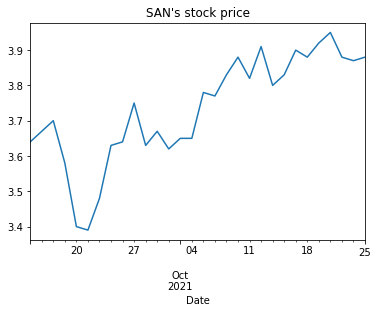

In [28]:
#Gráfico banco santander 1 año

ticker = yf.Ticker('SAN')
aapl_df = ticker.history(period="30d")
aapl_df['Close'].plot(title="SAN's stock price")
plt.savefig('SantanderYahoo.png')

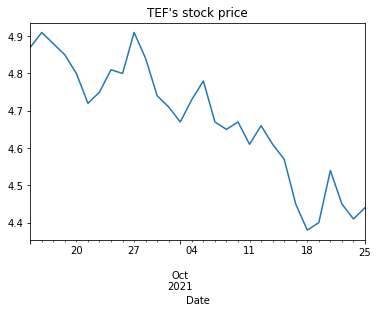

In [29]:
#GRÁFICO telefónica

ticker = yf.Ticker('TEF')
aapl_df = ticker.history(period="30d")
aapl_df['Close'].plot(title="TEF's stock price")
plt.savefig('TelefonicaYahoo.png')


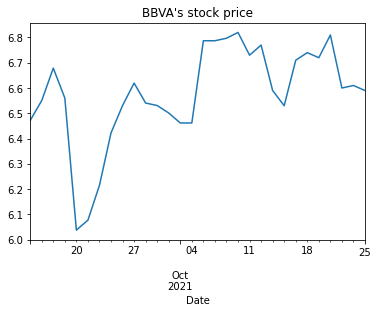

In [30]:
#GRÁFICO BANCO BBVA

ticker = yf.Ticker('BBVA')
aapl_df = ticker.history(period="30d")
aapl_df['Close'].plot(title="BBVA's stock price")
plt.savefig('BBVAYahoo.png')

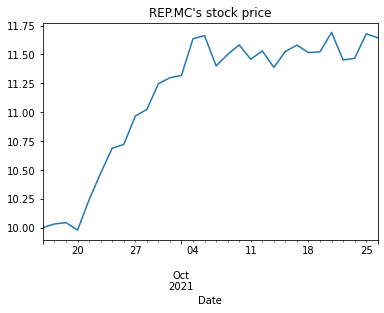

In [31]:
#GRÁFICO REPSOL

ticker = yf.Ticker('REP.MC')
aapl_df = ticker.history(period="30d")
aapl_df['Close'].plot(title="REP.MC's stock price")
plt.savefig('REPSOLYahoo.png')


Otras Anotaciones

In [32]:
datosyahoo=pd.read_csv('Bolsayahoo.csv', header=0) #Leo archivo de yahoo y lo transformo en la variable datosyahoo
print (datosyahoo)
print (datosyahoo ['Variacion Santander']) #pido que me imprima una columna
print (datosyahoo.ix[:2])

   Unnamed: 0       Fecha  Variacion Santander  Variacion Telefonica  \
0           0  2021-09-24                -0.02                 -0.03   
1           1  2021-09-27                -0.03                 -0.05   
2           2  2021-09-28                 0.08                  0.07   
3           3  2021-09-29                -0.03                 -0.01   
4           4  2021-09-30                 0.05                  0.01   
5           5  2021-10-01                -0.02                  0.00   
6           6  2021-10-04                 0.03                 -0.02   

   Variacion Repsol  Variacion BBVA  
0            -0.050           -0.05  
1            -0.186           -0.03  
2            -0.004            0.08  
3            -0.246           -0.07  
4            -0.036            0.05  
5            -0.168           -0.03  
6            -0.240            0.02  
0   -0.02
1   -0.03
2    0.08
3   -0.03
4    0.05
5   -0.02
6    0.03
Name: Variacion Santander, dtype: float64


AttributeError: 'DataFrame' object has no attribute 'ix'